In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs

# Load data

In [2]:
vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')

dataarray_SST_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_piControl_interp_2x2_15memens_2.nc')
dataarray_SST_cont.load()

dataarray_TOA_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_piControl_2x2_15memens.nc')
dataarray_TOA_cont.load()

dataarray_SST_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_historical_interp_2x2_15memens.nc')
dataarray_SST_hist.load()

dataarray_TOA_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_historical_2x2_15memens.nc')
dataarray_TOA_hist.load()

dataarray_Qs_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_hist_interp_15memens.nc')
dataarray_Qs_hist.load()

<xarray.DataArray (name: 15, time: 1500, lat: 88, lon: 179)>
array([[[[ 4.90165056e+00,  5.02030481e+00,  5.14833517e+00, ...,
           4.42925605e+00,  4.56485558e+00,  4.66646627e+00],
         [ 4.59733384e+00,  4.82168076e+00,  4.98723783e+00, ...,
           3.81284670e+00,  3.96564983e+00,  4.19904078e+00],
         [ 4.02822119e+00,  4.18452456e+00,  4.37871187e+00, ...,
           3.16195200e+00,  3.32776068e+00,  3.54453707e+00],
         ...,
         [-3.46124473e+01, -3.68575683e+01, -3.48434307e+01, ...,
          -3.44554857e+01, -3.57958553e+01, -3.51358641e+01],
         [-3.32735436e+01, -3.38893754e+01, -3.38385741e+01, ...,
          -3.26756667e+01, -3.27437460e+01, -3.27906597e+01],
         [-3.46177860e+01, -3.51192427e+01, -3.58445793e+01, ...,
          -3.36690564e+01, -3.51623532e+01, -3.55597275e+01]],

        [[-2.86197465e+00, -2.93874279e+00, -3.03927916e+00, ...,
          -2.56575976e+00, -2.67832265e+00, -2.74031600e+00],
         [-2.12785747e+00, -2.32005957e+00, -2.40554916e+00, ...,
          -1.76238901e+00, -1.80849465e+00, -1.92474648e+00],
         [-1.41721594e+00, -1.48068312e+00, -1.55627523e+00, ...,
          -9.75113796e-01, -1.02866159e+00, -1.15787975e+00],
...
         [-2.78088935e+01, -2.78776526e+01, -2.93542580e+01, ...,
          -1.90225108e+01, -1.93425562e+01, -2.20628261e+01],
         [-2.44885393e+01, -2.53342339e+01, -2.67468318e+01, ...,
          -1.73685251e+01, -2.00562108e+01, -2.04017211e+01],
         [-2.17705019e+01, -2.34594400e+01, -2.61322040e+01, ...,
          -2.20741132e+01, -2.23441102e+01, -2.22555440e+01]],

        [[ 2.00020313e+01,  2.02547712e+01,  2.04408099e+01, ...,
           1.97594779e+01,  1.98033927e+01,  1.99940870e+01],
         [ 1.87190357e+01,  1.87650739e+01,  1.88504934e+01, ...,
           1.84766899e+01,  1.86177975e+01,  1.85550708e+01],
         [ 1.79714223e+01,  1.81370286e+01,  1.83174774e+01, ...,
           1.72408851e+01,  1.75626934e+01,  1.76884266e+01],
         ...,
         [-3.28068227e+01, -3.18609009e+01, -3.11594645e+01, ...,
          -2.05865988e+01, -2.25901160e+01, -2.73886632e+01],
         [-2.14137497e+01, -2.32414394e+01, -2.30369152e+01, ...,
          -1.75088925e+01, -1.97793967e+01, -2.07191078e+01],
         [-2.20522095e+01, -2.36049736e+01, -2.36618611e+01, ...,
          -2.03961387e+01, -2.12793080e+01, -2.13185888e+01]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 1975-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [3]:
def yearlylag_fit(sst_dataset, rad_dataset):
    """
    Yearly lagged regression
    
    """

    rad_dataset_yearly = rad_dataset.shift(time=-12).isel(time=slice(0,1488)) # Lagged by a year
    rad_dataset_yearly = rad_dataset_yearly.rolling(time=12, center=True).mean('time') # Mean over the year
    rad_dataset_yearly = rad_dataset_yearly.isel(time=slice(12,1476))
    sst_dataset_yearly = sst_dataset.rolling(time=12, center=True).mean('time') # Mean over the year
    sst_dataset_yearly = sst_dataset_yearly.isel(time=slice(12,1476))
    
    SST_radfit = xr.DataArray(np.zeros((15,88,179)), dims=['name','lat','lon'])
    model_index = 0
    for model in rad_dataset_yearly.coords['name'].values:
        lat_index = 0
        for lat in rad_dataset_yearly.coords['lat'].values:
            lon_index = 0
            for lon in rad_dataset_yearly.coords['lon'].values:
                SST_slice = sst_dataset_yearly.sel(lat=lat).sel(lon=lon).sel(name=model)
                rad_slice = rad_dataset_yearly.sel(lat=lat).sel(lon=lon).sel(name=model)
                idx = np.isfinite(SST_slice) & np.isfinite(rad_slice)
                if not SST_slice[idx].size or not rad_slice[idx].size:
                    break
                SST_radfit[model_index, lat_index, lon_index] = np.polyfit(SST_slice[idx], rad_slice[idx], deg=1)[0]     
                lon_index += 1
            lat_index += 1
        model_index += 1
        print(model)

    SST_radfit.coords['lon'] = rad_dataset_yearly['lon'].values
    SST_radfit.coords['lat'] = rad_dataset_yearly['lat'].values
    SST_radfit.coords['name'] = rad_dataset_yearly['name'].values
    SST_radfit
    return SST_radfit

# Historical TOA + SST

In [6]:
sst_toa_hist_fit = yearlylag_fit(dataarray_SST_hist, dataarray_TOA_hist)

BCC-CSM2-MR
BCC-ESM1
CESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5-CanOE
CanESM5
EC-Earth3
GISS-E2-1-G
HadGEM3-GC31-LL
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MPI-ESM-1-2-HAM
NESM3


In [7]:
sst_toa_hist_fit

<xarray.DataArray (name: 15, lat: 88, lon: 179)>
array([[[-0.13006986, -0.135304  , -0.14617679, ..., -0.10554253,
         -0.1143563 , -0.11948628],
        [-0.1029932 , -0.1120975 , -0.12130792, ..., -0.07513302,
         -0.0824246 , -0.08697517],
        [-0.03724151, -0.04088748, -0.05066952, ..., -0.00832729,
         -0.01641364, -0.02433129],
        ...,
        [ 0.10747661,  0.09721057,  0.09404452, ...,  0.15715298,
          0.1410851 ,  0.1375736 ],
        [ 0.2918159 ,  0.28344559,  0.26882556, ...,  0.29888562,
          0.29575782,  0.29624856],
        [ 0.20946454,  0.20452866,  0.201342  , ...,  0.23376468,
          0.23114367,  0.22592115]],

       [[-0.20356731, -0.20548186, -0.20467538, ..., -0.20282764,
         -0.20151244, -0.20115897],
        [-0.13485761, -0.13877608, -0.14282843, ..., -0.12223613,
         -0.12497158, -0.12700454],
        [-0.10954905, -0.11237295, -0.11327768, ..., -0.0882683 ,
         -0.09537688, -0.10254533],
...
        [ 0.05642236,  0.06097894,  0.07230356, ...,  0.09222733,
          0.08984352,  0.08193736],
        [ 0.02348833,  0.02806192,  0.03395288, ...,  0.02455636,
          0.02354887,  0.02327505],
        [-0.01103744, -0.01124713, -0.01184286, ..., -0.0080567 ,
         -0.01130646, -0.01002616]],

       [[ 0.22860601,  0.22349302,  0.22900127, ...,  0.21362678,
          0.22670509,  0.22699336],
        [ 0.12446142,  0.13260229,  0.12987322, ...,  0.1362658 ,
          0.14551204,  0.13209   ],
        [-0.02602294, -0.01559247, -0.01541501, ...,  0.00159565,
         -0.02218613, -0.02137618],
        ...,
        [-0.0358962 , -0.02314578, -0.00314723, ..., -0.10157232,
         -0.09068859, -0.07296063],
        [-0.10941781, -0.10665673, -0.09195174, ..., -0.1536809 ,
         -0.13415541, -0.12539497],
        [-0.16704248, -0.15527552, -0.1547888 , ..., -0.18955409,
         -0.17843647, -0.17370995]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [8]:
sst_toa_hist_fit_mean = sst_toa_hist_fit.mean('name')

Text(0.5, 1.0, 'Yearly Lagged Regression of Historical SST and TOA Radiation (N=15)')

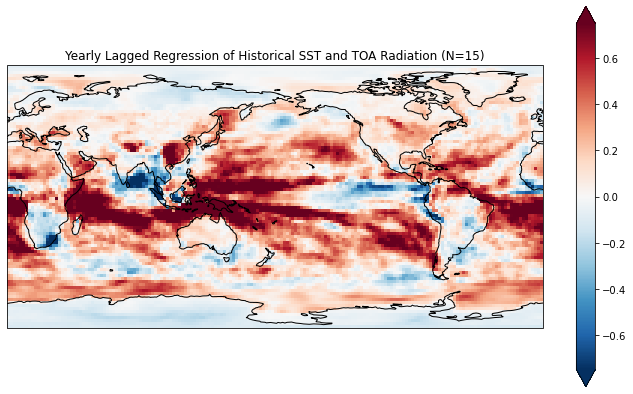

In [14]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_toa_hist_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-0.75, vmax=0.75, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.title('Yearly Lagged Regression of Historical SST and TOA Radiation (N=15)')

Text(0.5, 1.0, 'Yearly Lagged Regression of Historical SST and TOA Radiation (N=15)')

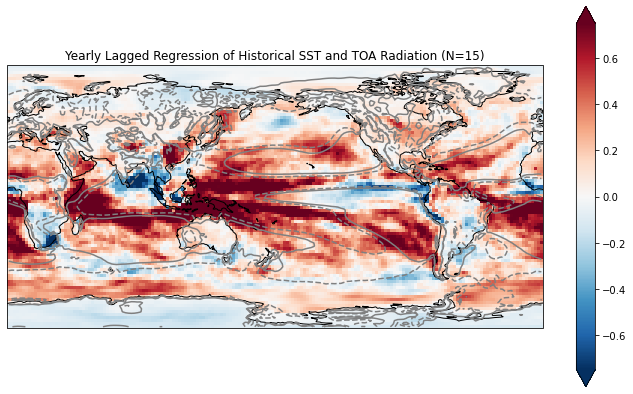

In [15]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_toa_hist_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-0.75, vmax=0.75, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Yearly Lagged Regression of Historical SST and TOA Radiation (N=15)')

# Historical SST + Qs Radiation

In [4]:
sst_surf_fit = yearlylag_fit(dataarray_SST_hist, dataarray_Qs_hist)

BCC-CSM2-MR
BCC-ESM1
CESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5-CanOE
CanESM5
EC-Earth3
GISS-E2-1-G
HadGEM3-GC31-LL
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MPI-ESM-1-2-HAM
NESM3


In [5]:
sst_surf_fit

<xarray.DataArray (name: 15, lat: 88, lon: 179)>
array([[[ 4.61612244e-02,  4.63707719e-02,  4.68118838e-02, ...,
          4.52765355e-02,  4.55024673e-02,  4.52427405e-02],
        [ 4.09121093e-02,  3.99689267e-02,  3.89579372e-02, ...,
          4.03287187e-02,  3.97838782e-02,  4.05740122e-02],
        [ 2.77154597e-02,  2.63895071e-02,  2.45742025e-02, ...,
          3.26942986e-02,  3.14080735e-02,  3.05141268e-02],
        ...,
        [-1.05762760e-01, -1.01185177e-01, -9.65287761e-02, ...,
         -1.42288489e-01, -1.29914886e-01, -8.85289008e-02],
        [ 1.55161773e-01,  1.62850629e-01,  1.75588399e-01, ...,
          7.32092693e-02,  9.33073933e-02,  1.18995617e-01],
        [ 1.85412694e-01,  1.85359083e-01,  2.06917449e-01, ...,
          1.06753178e-01,  1.57482017e-01,  1.69479865e-01]],

       [[ 7.37311531e-03,  6.82327745e-03,  7.35474281e-03, ...,
          8.72487499e-03,  8.39469027e-03,  7.73220174e-03],
        [ 1.76799232e-03,  1.39603529e-03,  2.41907640e-03, ...,
          2.42447087e-03,  2.26503225e-03,  2.28349280e-03],
        [-2.19173859e-03, -2.11850916e-03, -1.10334133e-03, ...,
         -1.02984329e-03, -1.45024125e-03, -1.11048087e-03],
...
        [ 2.69619988e-01,  2.30069616e-01,  1.83384437e-01, ...,
          3.68036118e-01,  3.48303805e-01,  3.29373684e-01],
        [ 2.55497850e-01,  2.54543212e-01,  2.53326937e-01, ...,
          2.85354043e-01,  2.77634719e-01,  2.68592738e-01],
        [ 1.49380270e-01,  1.51474257e-01,  1.50698898e-01, ...,
          1.54003434e-01,  1.52507220e-01,  1.49977507e-01]],

       [[-3.49013635e-02, -3.43270159e-02, -3.19771134e-02, ...,
         -3.93355508e-02, -3.82002415e-02, -3.55123054e-02],
        [-3.08888956e-02, -2.95830185e-02, -2.54205773e-02, ...,
         -3.76784565e-02, -3.62459041e-02, -3.36101530e-02],
        [-2.13715072e-02, -2.25682585e-02, -2.23253246e-02, ...,
         -2.20595869e-02, -2.02415636e-02, -1.88294727e-02],
        ...,
        [ 1.79864628e-01,  1.77777461e-01,  1.80408799e-01, ...,
          2.39927541e-01,  1.90957283e-01,  1.73423630e-01],
        [ 3.56142923e-01,  3.34418535e-01,  3.05498310e-01, ...,
          3.59172504e-01,  3.68907404e-01,  3.63759823e-01],
        [ 1.73194801e-01,  1.96344860e-01,  1.84144565e-01, ...,
          2.14352353e-01,  2.28515144e-01,  2.16868999e-01]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * name     (name) object 'BCC-CSM2-MR' 'BCC-ESM1' ... 'NESM3'

In [6]:
sst_surf_fit_mean = sst_surf_fit.mean('name')

Text(0.5, 1.0, 'Yearly Lagged Regression of Historical SST and Qs Radiation (N=15)')

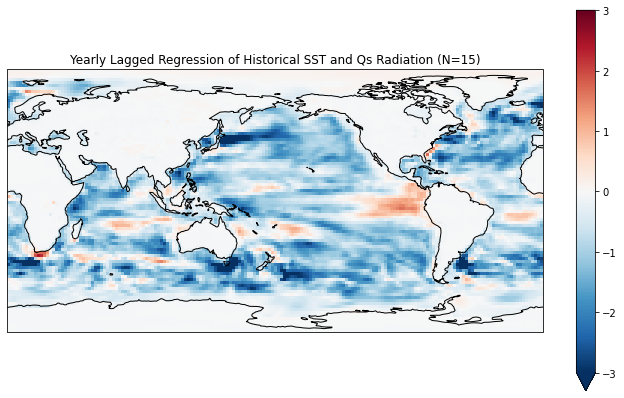

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_surf_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.title('Yearly Lagged Regression of Historical SST and Qs Radiation (N=15)')

Text(0.5, 1.0, 'Yearly Lagged Regression of Historical SST and Qs Radiation (N=15)')

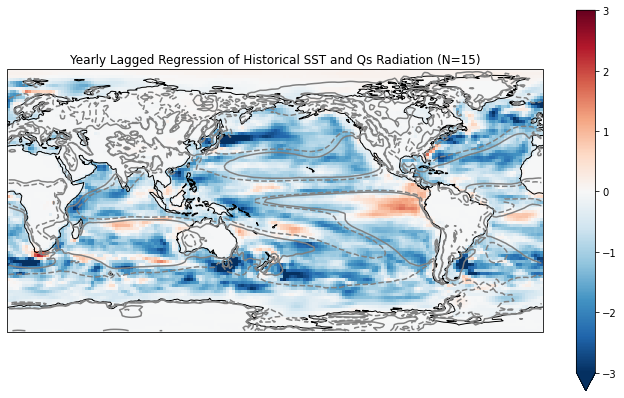

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_surf_fit_mean.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('Yearly Lagged Regression of Historical SST and Qs Radiation (N=15)')